In [1]:
# %matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib
from matplotlib import pyplot, cm
from numba import jit

In [2]:
def mFunc(xmin, xmax, ymin, ymax, width, height, maxiter):
    """
    Compute Matt's function and return an image
    
    :param xmin: minimum value of x
    :param xmax: maximum value of x
    :param ymin: minimum value of y
    :param ymax: maximum value of y
    :param width: width of the image to compute
    :param height: height of the image to compute
    :param maxiter: maximum number of iterations to consider
    
    :return: array
    :rtype: np.ndarray(shape=(height, width))
    """
    # this is actually the square of the threshold
    threshold = 4
    # create arrays that handle x, y positions
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    # create a mesh grid
    (X, Y) = np.meshgrid(x, y)
    # create initial array of c-values
    c = X + 1j*Y
    # create the data structure that will hold the z-values
    z = np.zeros(c.shape, dtype=np.complex64)
    # create the data structure that will hold the image
    output = np.zeros(c.shape)
    # run the number of iterations requested
    for g in range(maxiter):
        # get the array indices where the value of z is below the threshold
        idxs = np.less(z.real*z.real + z.imag*z.imag, threshold)
        # set the image to the number of iterations
        output[idxs] = g
        # iterate the z-values
        z[idxs] = z[idxs]**2 + c[idxs]
    # set the remaining values to 0 (they converge)
    output[output == maxiter-1] = 0
    return output

@jit
def numbaFunc(rC, iC, maxiter):
    """
    numba just-in-time compiled version of the above function
    """
    r = rC
    i = iC
    # this loop decomposes the math to increased efficiency/speed
    for n in range(maxiter):
        r2 = r*r
        i2 = i*i
        if r2 + i2 > 4.0:
            return n
        i = 2 * r * i + iC
        r = r2 - i2 + rC
    return 0

@jit
def numbaImage(xmin, xmax, ymin, ymax, width, height, maxiter):
    """
    numba just-in-time compiled version of the above function
    """
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    output = np.empty(shape=(height, width))
    for i in range(width):
        for j in range(height):
            output[j,i] = numbaFunc(x[i], y[j], maxiter)
    return output

In [3]:
%timeit myImage = mFunc(-2.0, 0.5, -1.25, 1.25, 1024, 1024, 200)

1.73 s ± 141 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%timeit myImage = numbaImage(-2.0, 0.5, -1.25, 1.25, 1024, 1024, 200)

236 ms ± 1.96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
# myImage = mFunc(-2.0, 0.5, -1.25, 1.25, 1024, 1024, 80)
# logImage = np.log(myImage)
# logImage[myImage == 0] = 0
myImage = numbaImage(-2.0, 0.5, -1.25, 1.25, 2048, 2048, 80)

<IPython.core.display.Javascript object>


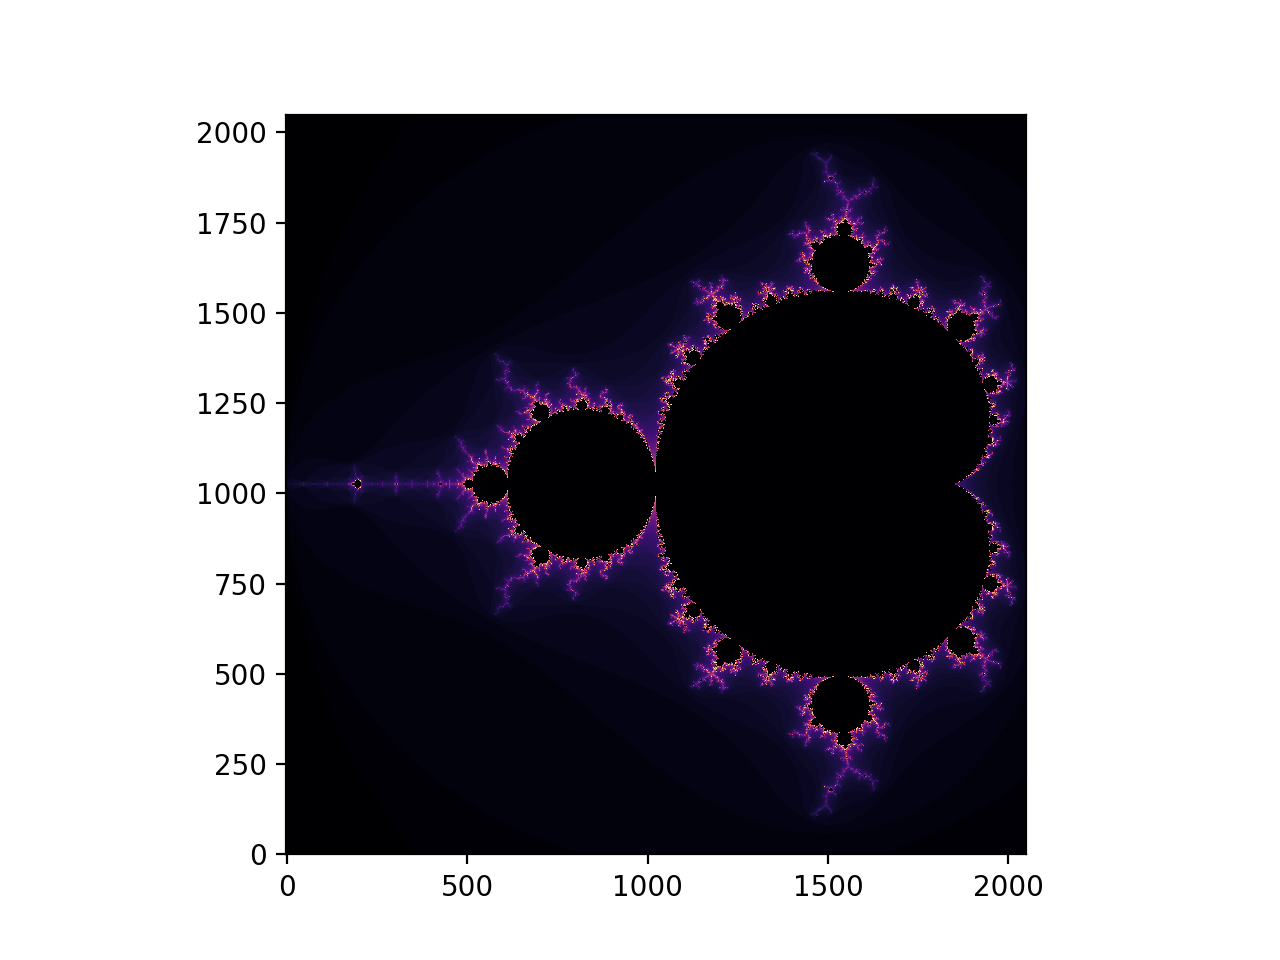

In [7]:
# fig = pyplot.figure(figsize=(6,6))
fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.imshow(myImage, cmap="magma", origin="lower")

In [8]:
# this math is to make the image have the correct aspect ratio
xmin=-0.74877
xmax=-0.74872
width=2560
dx = np.abs(xmax-xmin)/width

height=1600
ymin=0.06505
ymax=0.06510

yc = (ymax - ymin)/2 + ymin
ymin = yc - (height/2) * dx
ymax = yc + (height/2) * dx

In [ ]:
myImage = numbaImage(xmin, xmax, ymin, ymax, width, height, 2048)

<IPython.core.display.Javascript object>


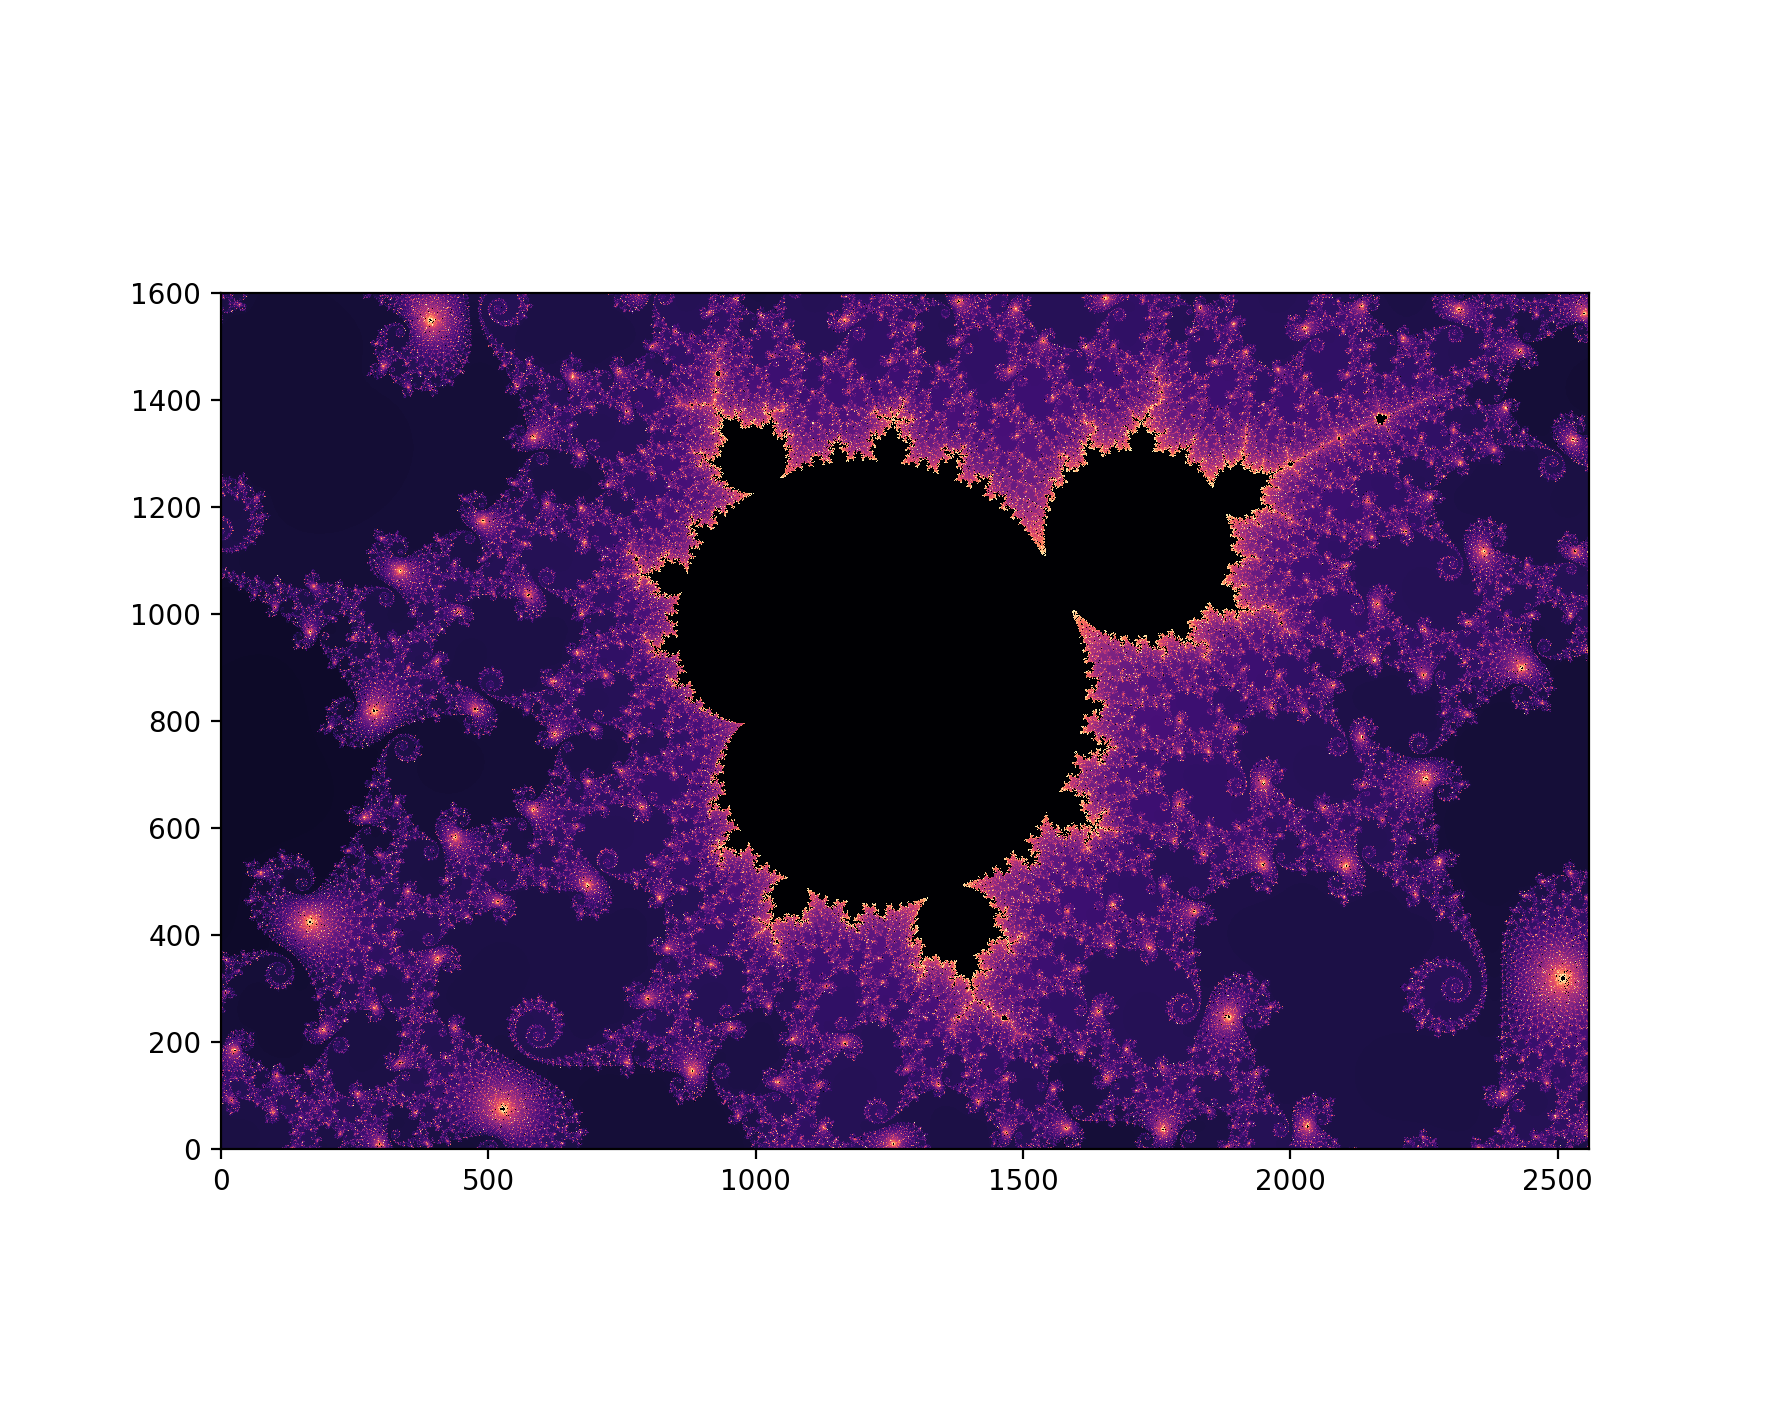

In [11]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.imshow(myImage, origin="lower", cmap="magma", interpolation="nearest")
# pyplot.imsave("/Users/harperic/Desktop/testImg.png", myImage, cmap="magma", origin="lower")

In [28]:
xmin=-2.5
xmax=0.5
width=2560
dx = (xmax-xmin)/width

height=1600
ymin=-1.5
ymax=1.5

yc = (ymax - ymin)/2 + ymin
ymin = yc - (height/2) * dx
ymax = yc + (height/2) * dx

0.0
-0.9375 0.9375


In [29]:
myImage = numbaImage(xmin, xmax, ymin, ymax, width, height, 1024)

/Users/harperic/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


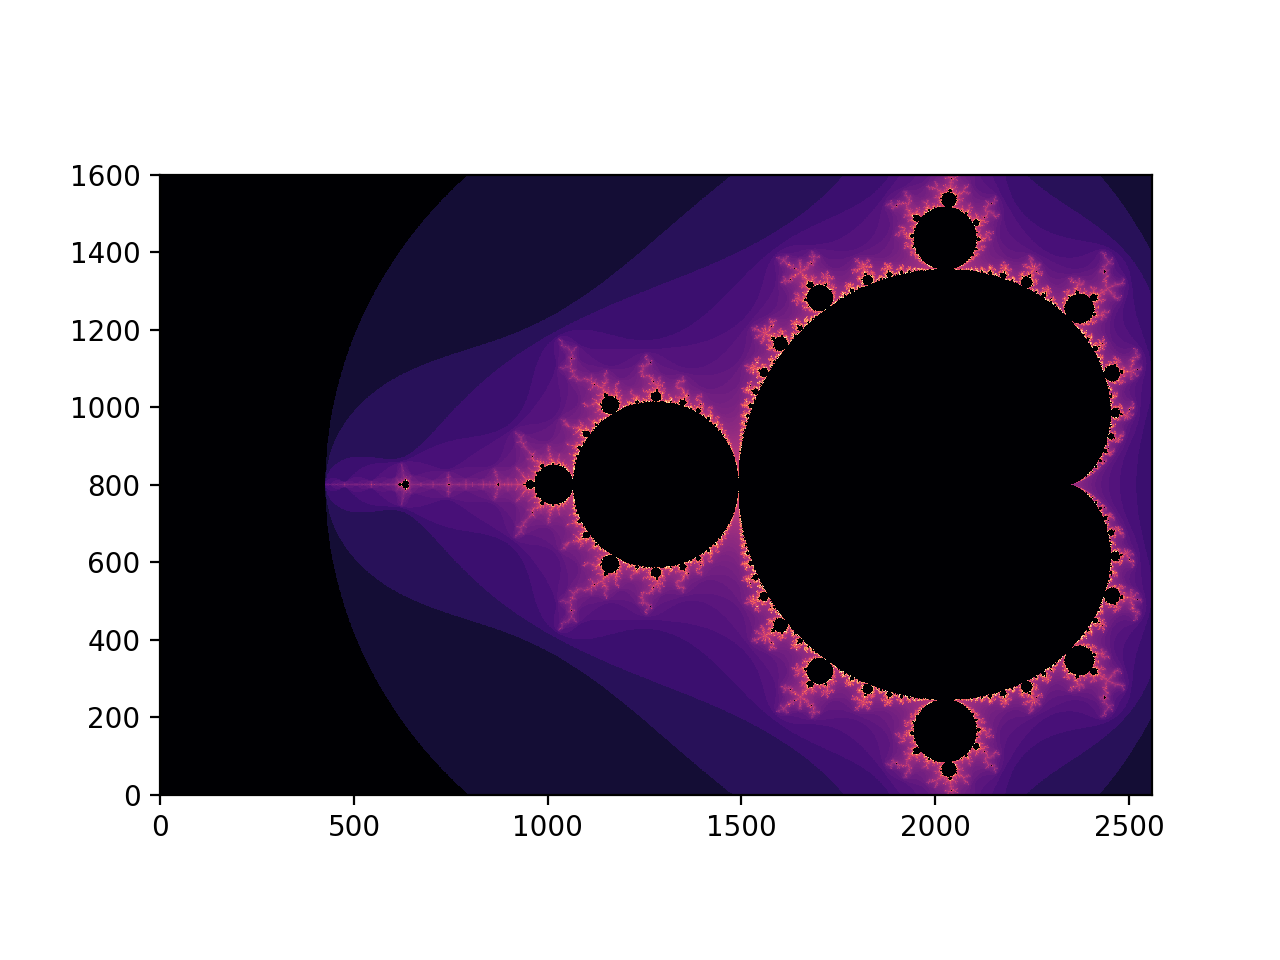

In [30]:
logImage = np.log(myImage)
logImage[myImage == 0] = 0
fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.imshow(logImage, origin="lower", cmap="magma", interpolation="nearest")
pyplot.imsave("/Users/harperic/Desktop/testImg.png", logImage, cmap="magma", origin="lower")